# Week 5 handin

## 01 Assignment

### Exercise 1

### Use data from Danmarks Statistik - Databanken

1 - Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol

2 - Open 'Konsol' and click 'Start Konsol'

3 - In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
    check the result
    in the code below this same get request is used to get information about all available data tables in 'databanken'.
    
4 - Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.

5 - With data aggregation and data visualization answer the following questions:

A - What is the change in pct of divorced danes from 2008 to 2020?

B - Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

C - Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

D - Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y is how many people in the 2 categories). Add lengend to show names on graphs

## 02 Status

Exercise 1 done

## Exercise 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [51]:
#What is the change in pct of divorced danes from 2008 to 2020?

## 2020 KV4
data2020 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=2020K4', sep=';')

## 2008 KV4
data2008 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=2008K4', sep=';') 

diff = d2020['INDHOLD'] - d2008['INDHOLD']
change_in_pct = (diff / d2008['INDHOLD']) * 100
print('Change in divorced danes from 2008 to 2020: ' +  str(float(change_in_pct)) + '%')

Change in divorced danes from 2008 to 2020: 27.82860818778404%


In [49]:
#Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

data2020_2 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U&Tid=2020K4&OMR%C3%85DE=101%2C461%2C751%2C851%2C561', sep=';')

sorted_cities_2020 = data2020_2.sort_values('INDHOLD', ascending=False)

print(sorted_cities_2020)

  CIVILSTAND     TID     OMRÅDE  INDHOLD
0      Ugift  2020K4  København   417782
2      Ugift  2020K4     Aarhus   211863
3      Ugift  2020K4    Aalborg   120226
1      Ugift  2020K4     Odense   113639
4      Ugift  2020K4    Esbjerg    55161


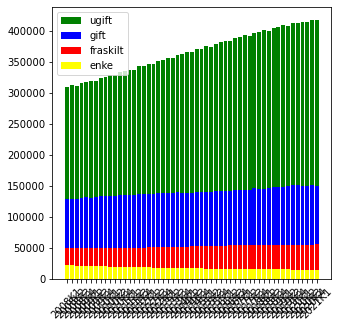

In [89]:
#Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

data_for_bar = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&Tid=*&CIVILSTAND=U%2CG%2CE%2CF', sep=";")

tid = sorted(list(set(data_for_bar['TID'])))

ugift = data_for_bar.loc[data_for_bar['CIVILSTAND'] == 'Ugift']['INDHOLD']
gift = data_for_bar.loc[data_for_bar['CIVILSTAND'] == 'Gift/separeret']['INDHOLD']
enke = data_for_bar.loc[data_for_bar['CIVILSTAND'] == 'Enke/enkemand']['INDHOLD']
fraskilt = data_for_bar.loc[data_for_bar['CIVILSTAND'] == 'Fraskilt']['INDHOLD']

plt.figure(figsize=(5,5))
plt.xticks(rotation=45)

p1 = plt.bar(tid, ugift, color='green')
p2 = plt.bar(tid, gift, color='blue')
p3 = plt.bar(tid, fraskilt, color='red')
p4 = plt.bar(tid, enke, color='yellow')

plt.legend([p1,p2,p3,p4],['ugift', 'gift','fraskilt', 'enke']) 

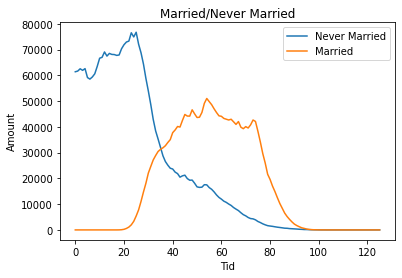

In [16]:
#Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020
#(Hint: x axis is age from 0-125, y is how many people in the 2 categories). Add lengend to show names on graphs

data_for_plots = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G%2CU&Tid=2020K4&ALDER=*', sep=";")

tid = list(range(0, 126))

ugift = data_for_plots.loc[data_for_plots['CIVILSTAND'] == 'Ugift']['INDHOLD'][1:]
gift = data_for_plots.loc[data_for_plots['CIVILSTAND'] == 'Gift/separeret']['INDHOLD'][1:]

plt.title('Married/Never Married')
plt.xlabel('Tid')
plt.ylabel('Amount')

plt.plot(tid, ugift, label="Never Married")
plt.plot(tid, gift, label="Married")

plt.legend()